In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [3]:
from luwiji.svm import illustration, demo

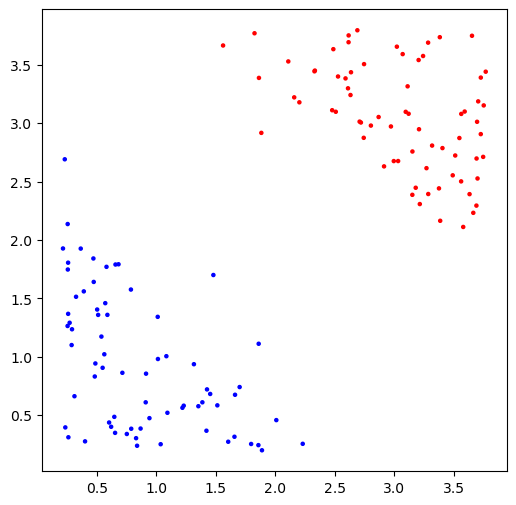

In [4]:
demo.problem(1)

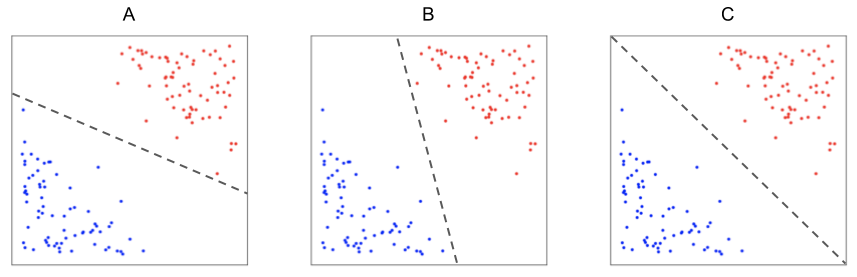

In [5]:
illustration.choose_one

In [6]:
demo.C(1)

interactive(children=(FloatLogSlider(value=10.0, description='C', max=1.0, min=-2.0, step=0.25), Output()), _d…

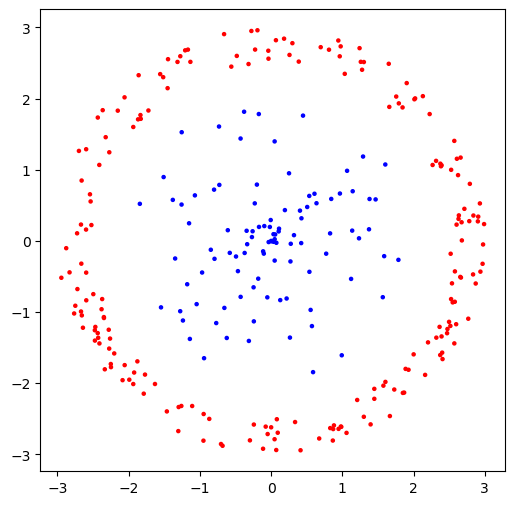

In [7]:
demo.problem(2)

In [8]:
demo.C(2)

interactive(children=(FloatLogSlider(value=10.0, description='C', max=1.0, min=-2.0, step=0.25), Output()), _d…

In [10]:
demo.rbf()

interactive(children=(IntSlider(value=90, description='elevation', max=90, step=15), FloatSlider(value=0.0, de…

In [14]:
demo.kernel(2)

interactive(children=(ToggleButtons(description='Kernel', options=('linear', 'rbf'), value='linear'), FloatLog…

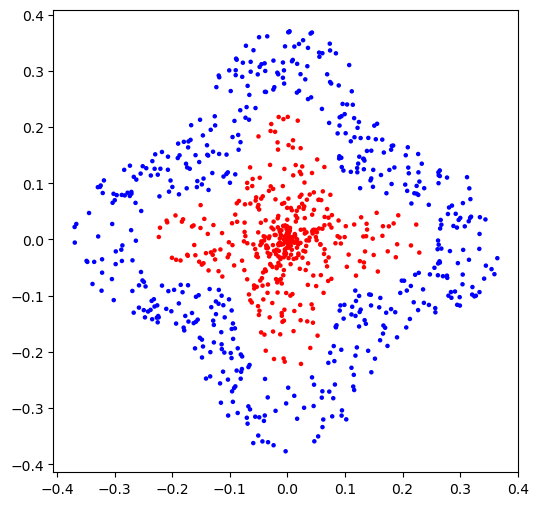

In [15]:
demo.problem(3)

In [16]:
demo.kernel(3)

interactive(children=(ToggleButtons(description='Kernel', options=('linear', 'rbf'), value='linear'), FloatLog…

In [18]:
demo.gamma()

interactive(children=(FloatLogSlider(value=31.622776601683793, description='gamma', max=1.5, min=-1.5, step=0.…

In [19]:
demo.svm()

interactive(children=(ToggleButtons(description='Problem', options=(1, 2, 3), value=1), Output()), _dom_classe…

## Suport vector regressor

In [20]:
df = pd.read_csv('carprice.csv', index_col='ID')
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
ID,,,,,,,,,,,,
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [21]:
df.isna().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage_kmpl           2
Engine_CC             36
Power_bhp            142
Seats                 42
Price                  0
dtype: int64

In [4]:
columns_drop = ['Name']

df.drop(columns=columns_drop, inplace=True)

In [5]:
X = df.drop(columns='Price')
y = df.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4762, 10), (1191, 10), (4762,), (1191,))

In [6]:
X_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats
ID,,,,,,,,,,
4380,Coimbatore,2016,60913,Petrol,Manual,First,20.73,1373.0,91.1,5.0
2676,Kochi,2017,40459,Diesel,Manual,First,19.67,1582.0,126.2,5.0
647,Jaipur,2004,200000,Petrol,Manual,First,0.00,1086.0,NaN,5.0
5966,Hyderabad,2018,1048,Petrol,Manual,First,18.90,998.0,67.1,5.0
2198,Ahmedabad,2013,96000,Diesel,Manual,Second,23.50,1498.0,90.0,5.0


In [7]:
from jcopml.tuning import grid_search_params as gsp

gsp.svm_params

{'algo__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [8]:
from jcopml.pipeline import num_pipe, cat_pipe
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['Year', 'Kilometers_Driven', 'Mileage_kmpl', 'Engine_CC', 'Power_bhp', 'Seats']),
    ('categoric', cat_pipe(encoder='onehot'), ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])

model = GridSearchCV(pipeline, gsp.svm_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits


c:\Users\HP\miniconda3\envs\jcopml\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 10.0, 'algo__gamma': 0.001}
0.4191924234077009 0.08719422320538917 0.055845667362476537


## scalling 

In [9]:
from jcopml.pipeline import num_pipe, cat_pipe
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust'), ['Year', 'Kilometers_Driven', 'Mileage_kmpl', 'Engine_CC', 'Power_bhp', 'Seats']),
    ('categoric', cat_pipe(encoder='onehot'), ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])

model = GridSearchCV(pipeline, gsp.svm_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits


c:\Users\HP\miniconda3\envs\jcopml\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 10.0, 'algo__gamma': 0.1}
0.8692907569381978 0.8365068850275925 0.8314246832596819


## polinomial features

In [14]:
gsp.svm_poly_params

{'prep__numeric__poly__degree': [1, 2, 3],
 'prep__numeric__poly__interaction_only': [True, False],
 'algo__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [15]:
from jcopml.pipeline import num_pipe, cat_pipe
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2, scaling='robust'), ['Year', 'Kilometers_Driven', 'Mileage_kmpl', 'Engine_CC', 'Power_bhp', 'Seats']),
    ('categoric', cat_pipe(encoder='onehot'), ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])

model = GridSearchCV(pipeline, gsp.svm_poly_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 294 candidates, totalling 882 fits


c:\Users\HP\miniconda3\envs\jcopml\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 10.0, 'algo__gamma': 0.1, 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
0.8692907569381978 0.8365068850275925 0.8314246832596819


## lanjutkan untuk kasus klasifikasi